## Radix Sort - MPI Weak Scaling

In [1]:
# Jonathan Kutsch
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
# dataframes
tk = th.Thicket.from_caliperreader(glob("/scratch/user/jonathankutsch/radix/radix/build/*.cali"))
tk.dataframe = tk.dataframe.drop(["spot.channel"], axis=1)
tk.dataframe = tk.dataframe.drop(["Min time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Max time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Total time"],axis=1)
tk.dataframe = tk.dataframe.drop(["Variance time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["nid"],axis=1)

In [3]:
# Performance data
tk.dataframe

Avg time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              15253080         0.778511   
                                                  20885860        85.686148   
                                                  148334837       42.578668   
                                                  157593170        0.284493   
                                                  162219207       85.254388   
                                                  180596001        1.108244   
                                                  187456116        0.670753   
                                                  222083088        0.069996   
                                                  225194923      101.178743   
                                                  228205184        1.835454   
                                                  254092752        0.023005   
                                                  264061812        0.357337   
                                                  298537899        0.120466   
                                                  334108191      306.476490   
                                                  348959619       95.682872   
                                                  394559370        0.543611   
                                                  427559273        0.075970   
                                                  439549323        0.040264   
                                                  507155105        2.202009   
                                                  561188750      190.084323   
                                                  594481608        0.175822   
                                                  597785548       40.651757   
                                                  611159881        3.690397   
                                                  619610176        8.789769   
                                                  633341042      182.030356   
                                                  633719008        6.202754   
                                                  677144255       12.622824   
                                                  680785466       47.579170   
                                                  688822776       95.912262   
                                                  732990297       30.409641   
                                                  760216472       10.340177   
                                                  805253931        2.274610   
                                                  818114101       49.185943   
                                                  829527828        5.175711   
                                                  843055466      112.734055   
                                                  850109765        0.187618   
                                                  869904116        0.144811   
                                                  877675101      111.401498   
                                                  884381071       24.733214   
                                                  899079545        6.193720   
                                                  904927144        1.661333   
                                                  910292345        5.191707   
                                                  927373825       24.738265   
                                                  929138848        0.026730   
                                                  942559326        0.806017   
                                                  957985469        0.139656   
                                                  982090299        0.281182   
                                                  1003908599       1.330537   
                                                  1014961830      24.882880   
                                 

In [4]:
#Printing Thicket Tree
tk.statsframe.dataframe["time"] = 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
└─ 1.000 whole_computation
   ├─ 1.000 check_correctness
   ├─ 1.000 comm
   │  └─ 1.000 comp_large
   │     └─ 1.000 comm_large
   ├─ 1.000 comp
   │  └─ 1.000 comp_large
   │     └─ 1.000 comm_large
   └─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [5]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
15253080,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,a1048576-p64-i2.cali,true,1701449276,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 1048576, 2, 64]",c,Radix Sort,MPI,int,4,1048576,ReverseSorted,64,9,Online
20885860,2.11.0-dev,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,a4194304-p256-i1.cali,true,1701452040,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 4194304, 1, 256]",c,Radix Sort,MPI,int,4,4194304,Random,256,9,Online
148334837,2.11.0-dev,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,a1048576-p512-i1.cali,true,1701453141,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 1048576, 1, 512]",c,Radix Sort,MPI,int,4,1048576,Random,512,9,Online
157593170,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,a65536-p32-i3.cali,true,1701454082,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 65536, 3, 32]",c,Radix Sort,MPI,int,4,65536,1%%perturbed,32,9,Online
162219207,2.11.0-dev,1024,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,a1048576-p1024-i1.cali,true,1701457306,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 1048576, 1, 1024]",c,Radix Sort,MPI,int,4,1048576,Random,1024,9,Online
180596001,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,a65536-p128-i3.cali,true,1701451379,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 65536, 3, 128]",c,Radix Sort,MPI,int,4,65536,1%%perturbed,128,9,Online
187456116,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,a262144-p16-i0.cali,true,1701454282,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 262144, 0, 16]",c,Radix Sort,MPI,int,4,262144,Sorted,16,9,Online
222083088,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,a262144-p2-i1.cali,true,1701454204,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 262144, 1, 2]",c,Radix Sort,MPI,int,4,262144,Random,2,9,Online
225194923,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,a16777216-p64-i1.cali,true,1701457061,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 16777216, 1, 64]",c,Radix Sort,MPI,int,4,16777216,Random,64,9,Online


In [6]:
gb = tk.groupby(["InputType", "InputSize"])

28  thickets created...
{('1%%perturbed', 65536): <thicket.thicket.Thicket object at 0x2af90fe7b280>, ('1%%perturbed', 262144): <thicket.thicket.Thicket object at 0x2af90fede0d0>, ('1%%perturbed', 1048576): <thicket.thicket.Thicket object at 0x2af90fef4ee0>, ('1%%perturbed', 4194304): <thicket.thicket.Thicket object at 0x2af90fedb940>, ('1%%perturbed', 16777216): <thicket.thicket.Thicket object at 0x2af90ffba610>, ('1%%perturbed', 67108864): <thicket.thicket.Thicket object at 0x2af910036700>, ('1%%perturbed', 268435456): <thicket.thicket.Thicket object at 0x2af90fd45e80>, ('Random', 65536): <thicket.thicket.Thicket object at 0x2af90fe5cf40>, ('Random', 262144): <thicket.thicket.Thicket object at 0x2af90fe600a0>, ('Random', 1048576): <thicket.thicket.Thicket object at 0x2af90fe8d7f0>, ('Random', 4194304): <thicket.thicket.Thicket object at 0x2af90ff0fe50>, ('Random', 16777216): <thicket.thicket.Thicket object at 0x2af91013ed30>, ('Random', 67108864): <thicket.thicket.Thicket object at 0

In [7]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [8]:
ctk.dataframe

(1%%perturbed, 65536)  \
                                                                    Avg time/rank   
node                                              num_procs                         
{'name': 'main', 'type': 'function'}              2                      0.031992   
                                                  4                      0.044395   
                                                  8                      0.084184   
                                                  16                     0.144811   
                                                  32                     0.284493   
                                                  64                     0.050426   
                                                  128                    1.108244   
                                                  256                    2.182389   
                                                  512                    4.382074   
                                                  1024                   8.746118   
{'name': 'whole_computation', 'type': 'function'} 2                      0.031943   
                                                  4                      0.044344   
                                                  8                      0.084133   
                                                  16                     0.144764   
                                                  32                     0.284440   
                                                  64                     0.050378   
                                                  128                    1.108191   
                                                  256                    2.182340   
                                                  512                    4.382026   
                                                  1024                   8.746049   
{'name': 'check_correctness', 'type': 'function'} 2                      0.000112   
                                                  4                      0.000108   
                                                  8                      0.000109   
                                                  16                     0.000124   
                                                  32                     0.000137   
                                                  64                     0.000146   
                                                  128                    0.000198   
                                                  256                    0.000138   
                                                  512                    0.000138   
                                                  1024                   0.000140   
{'name': 'comm', 'type': 'function'}              2                      0.013088   
                                                  4                      0.009794   
                                                  8                      0.011831   
                                                  16                     0.013305   
                                                  32                     0.018453   
                                                  64                     0.040331   
                                                  128                    0.120267   
                                                  256                    0.108204   
                                                  512                    0.373788   
                                                  1024                   0.412121   
{'name': 'comp_large', 'type': 'function'}        2                      0.008531   
                                                  4                      0.008642   
                                                  8                      0.009375   
                                                  16                     0.010908   
                                                  32             

In [9]:
# Drop unwanted columns
#ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (("1%%perturbed",65536), "nid"), (("1%%perturbed",65536),"Min time/rank"), (("1%%perturbed",65536),"Max time/rank"), (("1%%perturbed",65536),"Total time"), (("1%%perturbed",65536),"Variance time/rank"), (("Random",65536),"nid"), (("Random",65536),"Min time/rank"), (("Random",65536),"Max time/rank"), (("Random",65536),"Total time"), (("Random",65536),"Variance time/rank"),(("Sorted",65536),"nid"),(("Sorted",65536),"Min time/rank"), (("Sorted",65536),"Max time/rank"), (("Sorted",65536),"Total time"), (("Sorted",65536),"Variance time/rank"),(("ReverseSorted",65536),"nid"),(("ReverseSorted",65536),"Min time/rank"), (("ReverseSorted",65536),"Max time/rank"), (("ReverseSorted",65536),"Total time"), (("ReverseSorted",65536),"Variance time/rank") ], axis=1)
#ctk.dataframe = ctk.dataframe.reset_index().drop([(("1%%perturbed",262144), "nid"), (("1%%perturbed",262144),"Min time/rank"), (("1%%perturbed",262144),"Max time/rank"), (("1%%perturbed",262144),"Total time"), (("1%%perturbed",262144),"Variance time/rank"), (("Random",262144),"nid"), (("Random",262144),"Min time/rank"), (("Random",262144),"Max time/rank"), (("Random",262144),"Total time"), (("Random",262144),"Variance time/rank"),(("Sorted",262144),"nid"),(("Sorted",262144),"Min time/rank"), (("Sorted",262144),"Max time/rank"), (("Sorted",262144),"Total time"), (("Sorted",262144),"Variance time/rank"),(("ReverseSorted",262144),"nid"),(("ReverseSorted",262144),"Min time/rank"), (("ReverseSorted",262144),"Max time/rank"), (("ReverseSorted",262144),"Total time"), (("ReverseSorted",262144),"Variance time/rank") ], axis=1)
#ctk.dataframe = ctk.dataframe.reset_index().drop([(("1%%perturbed",1048576), "nid"), (("1%%perturbed",1048576),"Min time/rank"), (("1%%perturbed",1048576),"Max time/rank"), (("1%%perturbed",1048576),"Total time"), (("1%%perturbed",1048576),"Variance time/rank"), (("Random",1048576),"nid"), (("Random",1048576),"Min time/rank"), (("Random",1048576),"Max time/rank"), (("Random",1048576),"Total time"), (("Random",1048576),"Variance time/rank"),(("Sorted",1048576),"nid"),(("Sorted",1048576),"Min time/rank"), (("Sorted",1048576),"Max time/rank"), (("Sorted",1048576),"Total time"), (("Sorted",1048576),"Variance time/rank"),(("ReverseSorted",1048576),"nid"),(("ReverseSorted",1048576),"Min time/rank"), (("ReverseSorted",1048576),"Max time/rank"), (("ReverseSorted",1048576),"Total time"), (("ReverseSorted",1048576),"Variance time/rank") ], axis=1)
#ctk.dataframe = ctk.dataframe.drop([("index","")], axis=1)

ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [10]:
ctk.dataframe

(1%%perturbed, 65536) (1%%perturbed, 262144)  \
                                    Avg time/rank          Avg time/rank   
name              num_procs                                                
main              2                      0.031992               0.126008   
                  4                      0.044395               0.204117   
                  8                      0.084184               0.355735   
                  16                     0.144811               0.683414   
                  32                     0.284493               1.335587   
                  64                     0.050426               0.192011   
                  128                    1.108244               5.191707   
                  256                    2.182389              10.322974   
                  512                    4.382074              20.662978   
                  1024                   8.746118              41.048699   
whole_computation 2                      0.031943               0.125956   
                  4                      0.044344               0.204069   
                  8                      0.084133               0.355686   
                  16                     0.144764               0.683363   
                  32                     0.284440               1.335536   
                  64                     0.050378               0.191955   
                  128                    1.108191               5.191659   
                  256                    2.182340              10.322927   
                  512                    4.382026              20.662929   
                  1024                   8.746049              41.048609   
check_correctness 2                      0.000112               0.000123   
                  4                      0.000108               0.000133   
                  8                      0.000109               0.000129   
                  16                     0.000124               0.000145   
                  32                     0.000137               0.000143   
                  64                     0.000146               0.000144   
                  128                    0.000198               0.000142   
                  256                    0.000138               0.000141   
                  512                    0.000138               0.000201   
                  1024                   0.000140               0.000160   
comm              2                      0.013088               0.040652   
                  4                      0.009794               0.043422   
                  8                      0.011831               0.047333   
                  16                     0.013305               0.058005   
                  32                     0.018453               0.082778   
                  64                     0.040331               0.146101   
                  128                    0.120267               0.247522   
                  256                    0.108204               0.461744   
                  512                    0.373788               4.509766   
                  1024                   0.412121               1.710973   
comp_large        2                      0.008531               0.038941   
                  4                      0.008642               0.040452   
                  8                      0.009375               0.042947   
                  16                     0.010908               0.049142   
                  32                     0.013851               0.062442   
                  64                     0.019783               0.086281   
                  128                    0.031947               0.134024   
                  256                    0.055837               0.229737   
                  512                    0.103664               0.422271   
                  1024                   0.199539               0.803612   


In [11]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
inputsizes = sorted(list(set(tk.metadata["InputSize"].to_list())))
inputtypes = sorted(list(set(tk.metadata["InputType"].to_list())))

In [12]:
ctk.dataframe

(1%%perturbed, 65536) (1%%perturbed, 262144)  \
                                    Avg time/rank          Avg time/rank   
name              num_procs                                                
main              2                      0.031992               0.126008   
                  4                      0.044395               0.204117   
                  8                      0.084184               0.355735   
                  16                     0.144811               0.683414   
                  32                     0.284493               1.335587   
                  64                     0.050426               0.192011   
                  128                    1.108244               5.191707   
                  256                    2.182389              10.322974   
                  512                    4.382074              20.662978   
                  1024                   8.746118              41.048699   
whole_computation 2                      0.031943               0.125956   
                  4                      0.044344               0.204069   
                  8                      0.084133               0.355686   
                  16                     0.144764               0.683363   
                  32                     0.284440               1.335536   
                  64                     0.050378               0.191955   
                  128                    1.108191               5.191659   
                  256                    2.182340              10.322927   
                  512                    4.382026              20.662929   
                  1024                   8.746049              41.048609   
check_correctness 2                      0.000112               0.000123   
                  4                      0.000108               0.000133   
                  8                      0.000109               0.000129   
                  16                     0.000124               0.000145   
                  32                     0.000137               0.000143   
                  64                     0.000146               0.000144   
                  128                    0.000198               0.000142   
                  256                    0.000138               0.000141   
                  512                    0.000138               0.000201   
                  1024                   0.000140               0.000160   
comm              2                      0.013088               0.040652   
                  4                      0.009794               0.043422   
                  8                      0.011831               0.047333   
                  16                     0.013305               0.058005   
                  32                     0.018453               0.082778   
                  64                     0.040331               0.146101   
                  128                    0.120267               0.247522   
                  256                    0.108204               0.461744   
                  512                    0.373788               4.509766   
                  1024                   0.412121               1.710973   
comp_large        2                      0.008531               0.038941   
                  4                      0.008642               0.040452   
                  8                      0.009375               0.042947   
                  16                     0.010908               0.049142   
                  32                     0.013851               0.062442   
                  64                     0.019783               0.086281   
                  128                    0.031947               0.134024   
                  256                    0.055837               0.229737   
                  512                    0.103664               0.422271   
                  1024                   0.199539               0.803612   


In [13]:
# Plotting

In [14]:
# Option 1

In [15]:
# Use pandas.DataFrame.plot to automatically interface with matplotlib

In [16]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    legend = plot.legend(loc='upper center', fontsize='x-small')
    return plot

In [17]:
# Option 2

In [18]:
# Use matplotlib.pyplot directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [19]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=2)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [20]:
# Graphs

In [21]:
ctk.dataframe.loc["main"]

,"(1%%perturbed, 65536)","(1%%perturbed, 262144)","(1%%perturbed, 1048576)","(1%%perturbed, 4194304)","(1%%perturbed, 16777216)","(1%%perturbed, 67108864)","(1%%perturbed, 268435456)","(Random, 65536)","(Random, 262144)","(Random, 1048576)","(Random, 4194304)","(Random, 16777216)","(Random, 67108864)","(Random, 268435456)","(ReverseSorted, 65536)","(ReverseSorted, 262144)","(ReverseSorted, 1048576)","(ReverseSorted, 4194304)","(ReverseSorted, 16777216)","(ReverseSorted, 67108864)","(ReverseSorted, 268435456)","(Sorted, 65536)","(Sorted, 262144)","(Sorted, 1048576)","(Sorted, 4194304)","(Sorted, 16777216)","(Sorted, 67108864)","(Sorted, 268435456)"
,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank
num_procs,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.031992,0.126008,0.561579,2.274610,10.437824,41.854497,186.855421,0.023005,0.069996,0.268219,1.068045,4.321698,17.346848,69.482140,0.026631,0.120466,0.543611,2.199894,10.139591,40.645495,182.030356,0.026730,0.120166,0.541256,2.193557,10.110770,40.651757,181.934693
4,0.044395,0.204117,0.924861,3.774009,17.186258,68.695903,313.538252,0.028657,0.109811,0.429659,1.747728,6.991629,27.909875,111.401498,0.042656,0.198451,0.904141,3.699247,16.934402,67.734108,303.114840,0.042697,0.198683,0.905125,3.690397,16.891138,67.522099,306.476490
8,0.084184,0.355735,1.679501,6.735962,30.695773,122.752441,NaN,0.050749,0.193356,0.768093,3.167849,12.314634,49.185943,NaN,0.078483,0.351997,1.663023,6.989339,30.409641,121.574829,NaN,0.075970,0.350375,1.661333,6.662393,30.682624,121.445659,NaN
16,0.144811,0.683414,3.173658,12.683923,57.808202,231.056319,NaN,0.093643,0.357337,1.443262,5.754850,23.065928,91.725128,NaN,0.144079,0.674099,3.155255,12.612146,57.524845,229.136818,NaN,0.146701,0.670753,3.152479,12.622824,57.468487,229.497745,NaN
32,0.284493,1.335587,6.202754,24.882880,112.992225,NaN,NaN,0.187618,0.702955,2.830787,11.318861,45.229701,NaN,NaN,0.281182,1.329546,6.193720,24.738265,112.734055,NaN,NaN,0.287572,1.330537,6.199580,24.733214,112.353164,NaN,NaN
64,0.050426,0.192011,0.806017,3.173722,219.974188,NaN,NaN,0.040264,0.139656,0.592676,2.168175,101.178743,NaN,NaN,0.047298,0.184430,0.778511,3.112011,220.799408,NaN,NaN,0.046403,0.175822,1.835454,3.114953,222.423085,NaN,NaN
128,1.108244,5.191707,24.002197,95.682872,NaN,NaN,NaN,0.704093,2.718146,10.836790,43.238265,NaN,NaN,NaN,1.093695,5.177641,24.024085,96.075314,NaN,NaN,NaN,1.093572,5.175711,23.918485,95.912262,NaN,NaN,NaN
256,2.182389,10.322974,47.747805,190.760667,NaN,NaN,NaN,1.374360,5.342778,21.439851,85.686148,NaN,NaN,NaN,2.201433,10.340177,47.789036,190.946743,NaN,NaN,NaN,2.202009,10.293606,47.579170,190.419033,NaN,NaN,NaN


In [22]:
# Weak Scaling

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


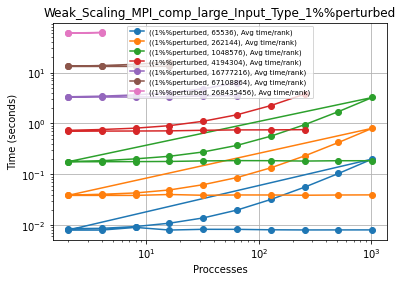

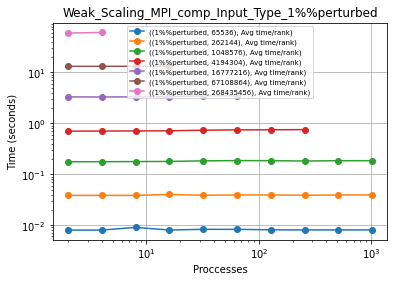

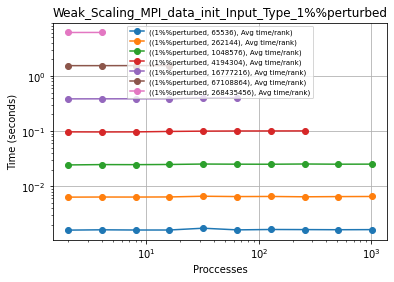

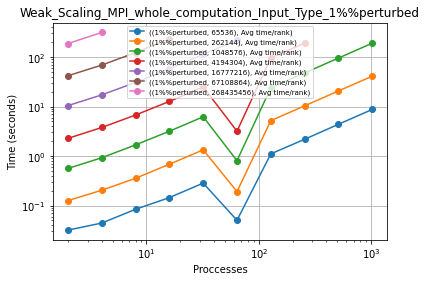

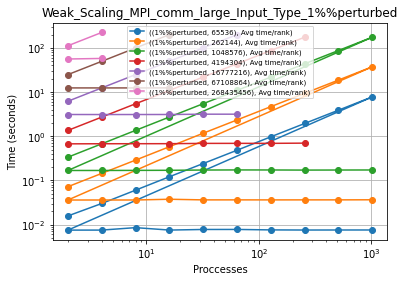

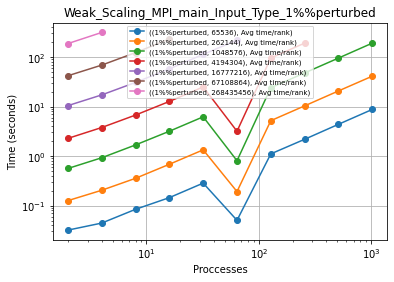

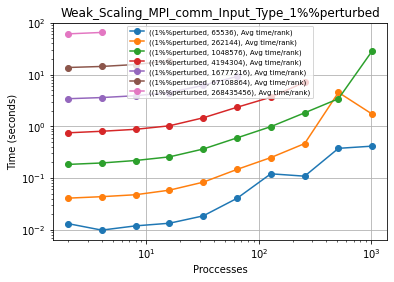

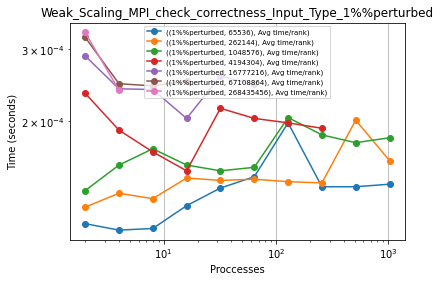

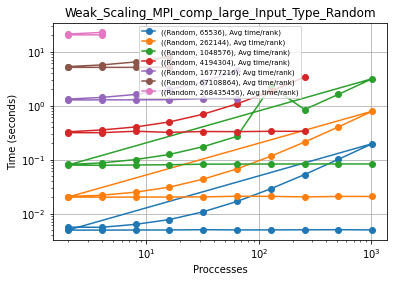

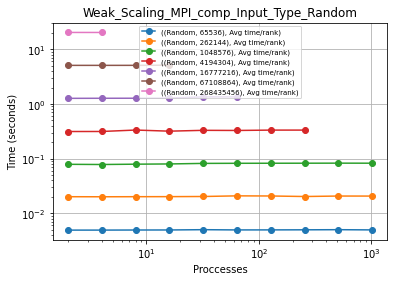

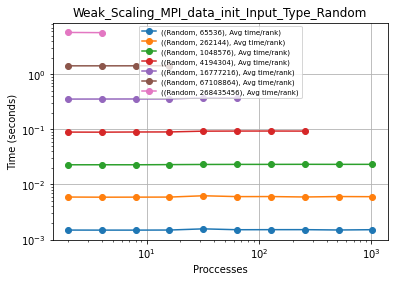

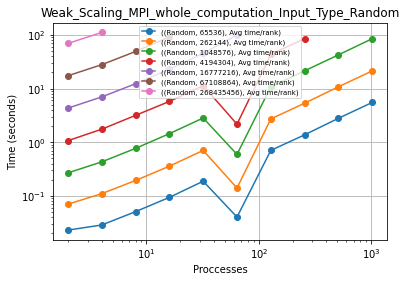

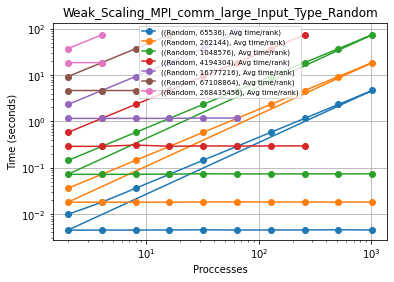

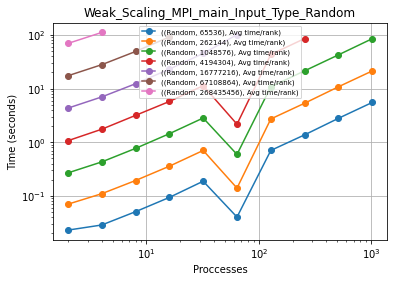

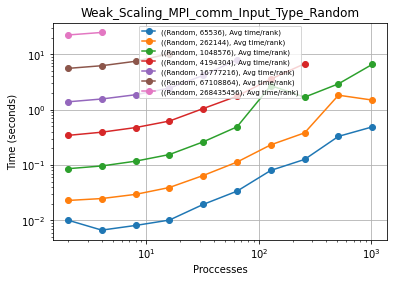

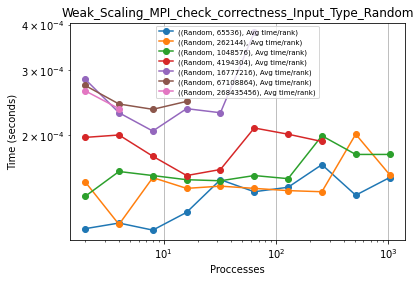

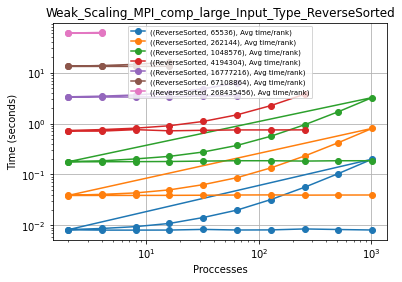

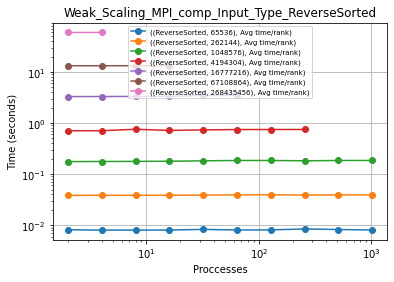

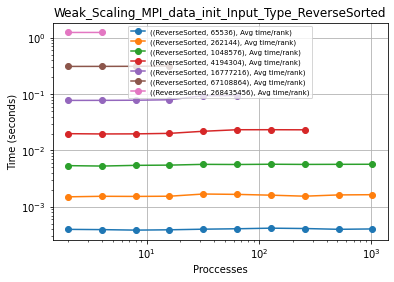

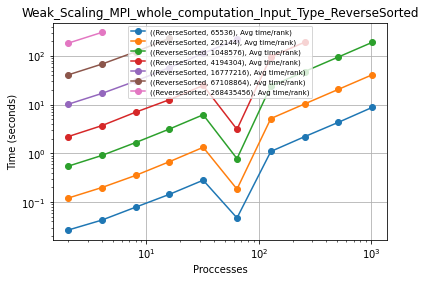

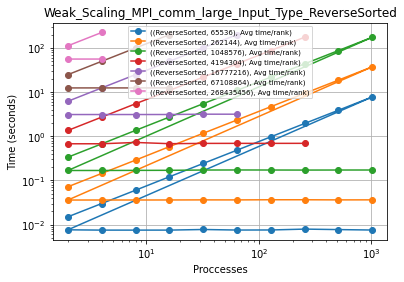

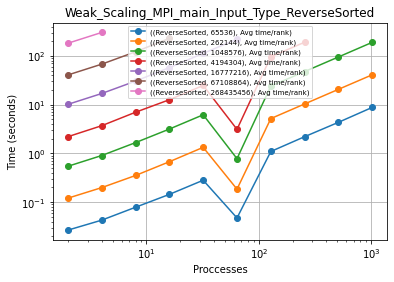

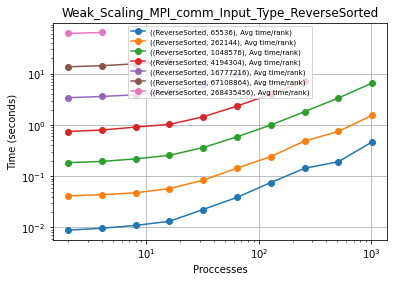

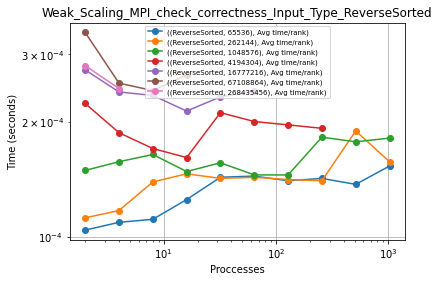

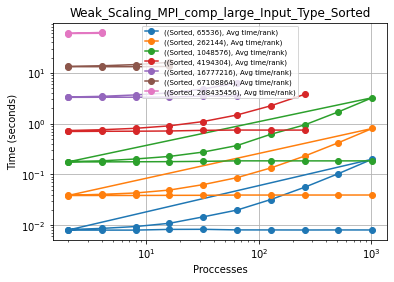

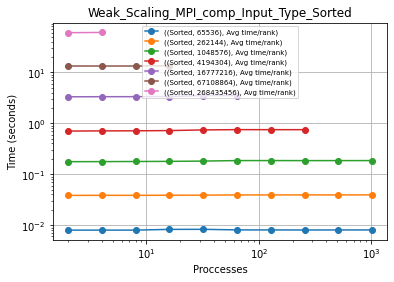

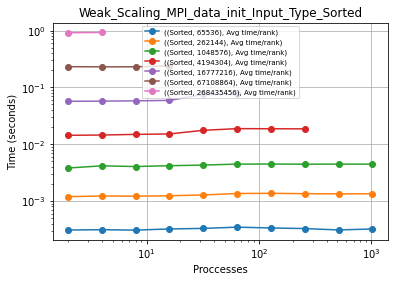

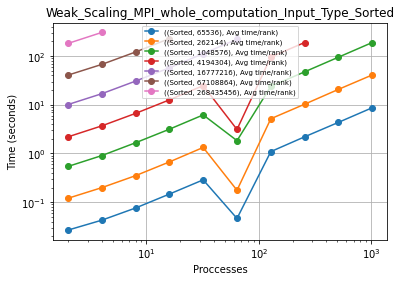

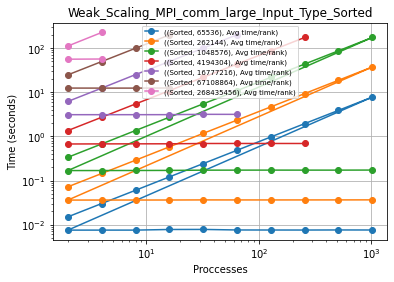

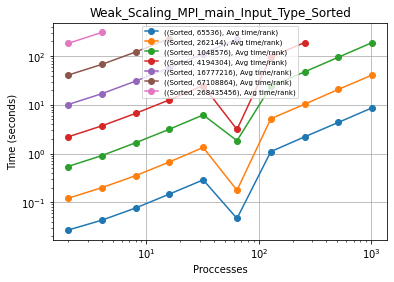

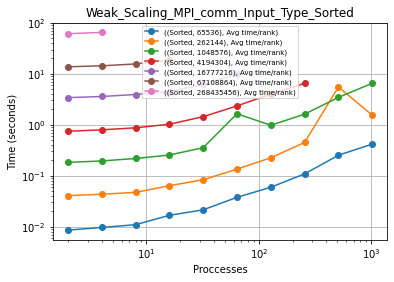

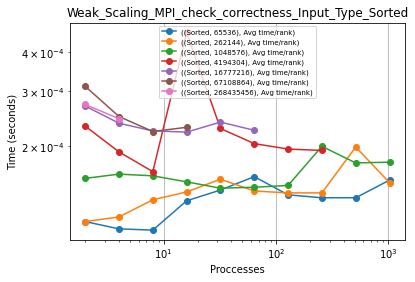

In [23]:
#Plotting Weak Scaling
for intype in inputtypes:
    cols = [(inputsize, "Avg time/rank") for inputsize in ctk.dataframe.columns.get_level_values(0) if inputsize[0] == intype]
    test = ctk.dataframe[cols]
    for name in function_names:
        plot = plot_pandas(
            df=test.loc[name],
            title=f"Weak_Scaling_MPI_{name}_Input_Type_{intype}",
            xlabel="Proccesses",
            ylabel="Time (seconds)",
            loglog=True
        )
        fig = plot.get_figure()
        fig.savefig(f"Weak_Scaling_MPI_{name}_Input_Type_{intype}.png")
        